#  ACC and GYR - physical activity detection

Usairim Isani - muisan@utu.fi

Joni Rajamaki - t09jraja@utu.fi

In [2]:
%xmode Minimal
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import tsfel
import random

# Machine learning packages - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier

Exception reporting mode: Minimal


In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
data_path = "./Data"
train_data_path = f'{data_path}/Train'
test_data_path = f'{data_path}/Test'
extracted_features_path = "./Features"

In [5]:
train_dir = os.listdir(train_data_path)

### Testing with single file

In [6]:
test_df = pd.read_csv("./Data/Train/standing/sample_ID10_exp19_125.csv")
cfg_file = tsfel.get_features_by_domain(json_path="./features.json")



In [7]:
tsfel.get_number_features(cfg_file)
extracted_features = tsfel.time_series_features_extractor(
    cfg_file, test_df, fs=50, window_size=250, verbose=0)
extracted_features.to_csv("./test.csv")
print(len(extracted_features.columns)/6)
extracted_features


149.0


,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Entropy,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_10,0_FFT mean coefficient_100,0_FFT mean coefficient_101,0_FFT mean coefficient_102,...,5_Spectral entropy,5_Spectral variation,5_Sum absolute diff,5_Variance,5_Wavelet absolute mean_0,5_Wavelet absolute mean_1,5_Wavelet energy_0,5_Wavelet energy_1,5_Wavelet entropy,5_Zero crossing rate
0,257.983808,5.057764,257.983808,0.64478,9.963536e-08,0.000004,0.000004,7.373815e-07,0.000002,0.000003,...,0.655464,0.100503,4.227187,0.00356,0.00001,0.000091,0.025914,0.068832,0.596355,29.0


Text(0, 0.5, 'Amplitude.')

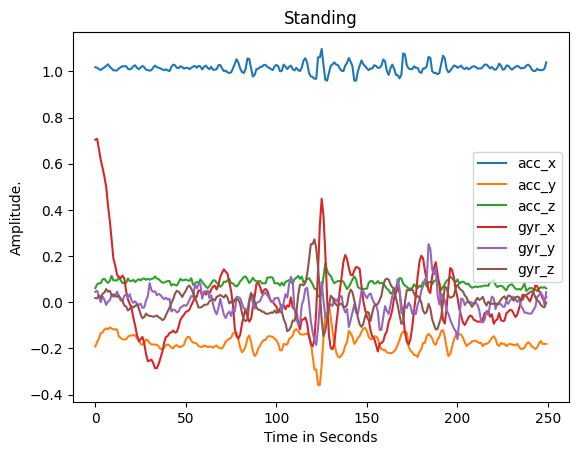

In [8]:
ax = test_df.plot.line()
ax.set_title("Standing")
ax.set_xlabel("Time in Seconds")
ax.set_ylabel("Amplitude.")


#### Plot for all activities in the dataset.

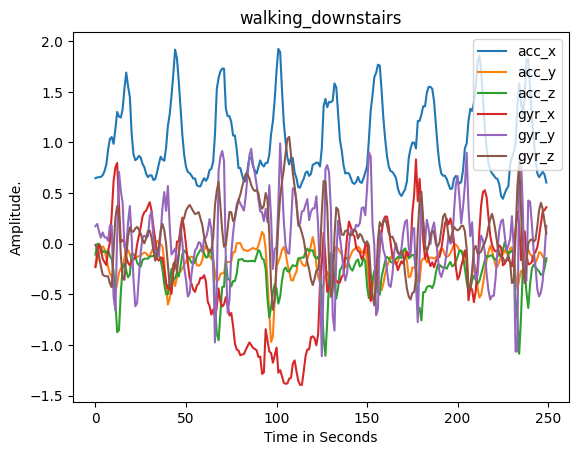

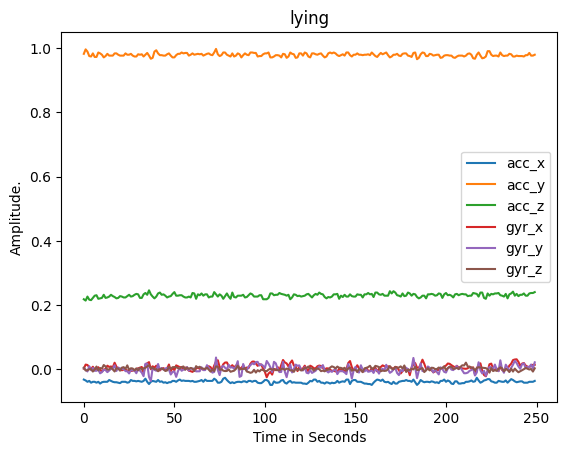

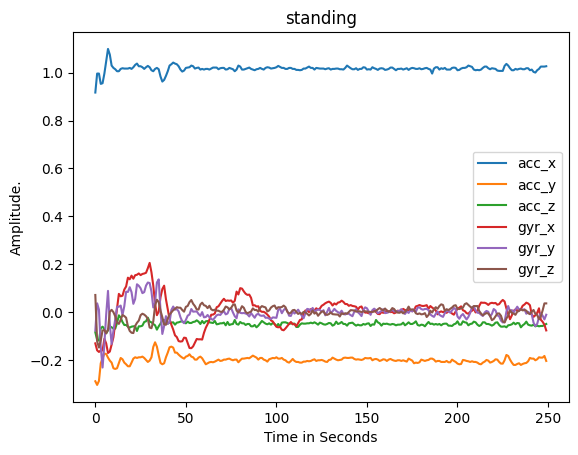

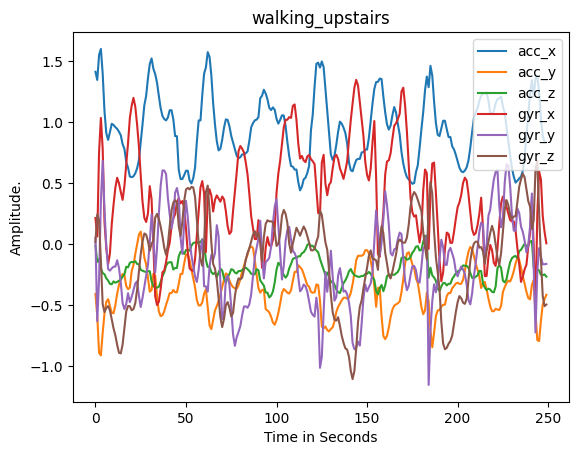

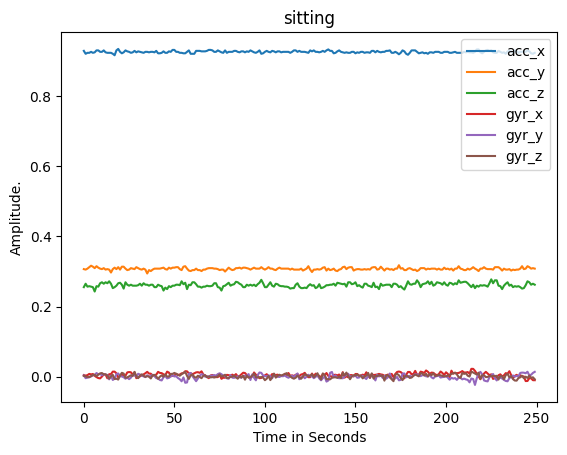

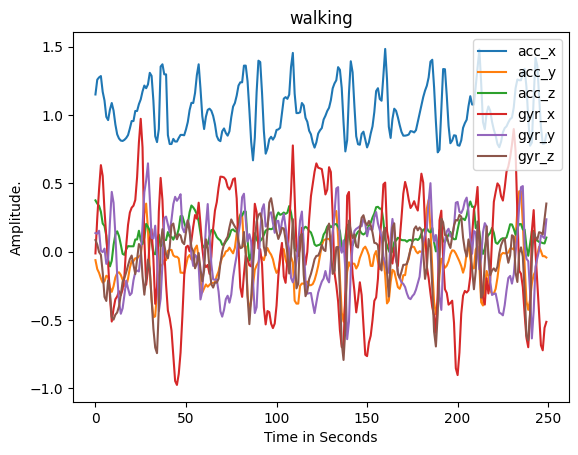

In [9]:
samples = []
for folder in os.listdir(train_data_path):
    file = random.choice(os.listdir(f'{train_data_path}/{folder}'))
    sample_df = pd.read_csv(f'{train_data_path}/{folder}/{file}')
    ax = sample_df.plot.line()
    ax.set_title(folder)
    ax.set_xlabel("Time in Seconds")
    ax.set_ylabel("Amplitude.")


In [10]:
def read_data(data_path):
    folders = {}
    for folder in os.listdir(data_path):
        samples = {}
        for file in os.listdir(f'{data_path}/{folder}'):
            with open(f'{data_path}/{folder}/{file}') as f:
                sample_df = pd.read_csv(f)
                samples[file]=sample_df
        folders[folder] = samples
    return folders


In [11]:
train_data = read_data(train_data_path)
test_data = read_data(test_data_path)

In [12]:
cfg_file = tsfel.get_features_by_domain(json_path="./features.json")
tsfel.get_number_features(cfg_file)

279

# Selected Features
The features are selected by setting the flag "`use`" `yes` or `no` in the `features.json` file.
- Spectral
  - FFT mean coefficient
  - Fundamental frequency
  - Max power spectrum (Max PSD)
  - Power bandwidth (PSD Bandwidth)
  - Spectral entropy
  - Spectral variation
  - Wavelet absolute mean (CWT absolute mean value of each wavelet scale)
  - Wavelet energy (CWT energy of each wavelet scale)
  - Wavelet entropy (CWT entropy of each wavelet scale)
- Statistical
  - Absolute energy
  - Entropy
  - Inter-quartile range
  - Kurtosis
  - Mean
  - Mean absolute deviation
  - Root mean square
  - Variance
- Temporal
  - Area under the curve
  - Autocorrelation
  - Mean absolute diff
  - Zero crossing rate



#### Extracting features for all the subjects and saving into a `train` and `test` csv for better usage.

In [13]:
def extract_features(data, out):
    for label in data:
        for subject in data[label]:
            subject_df = data[label][subject]
            extracted_features = tsfel.time_series_features_extractor(cfg_file, subject_df, fs=50, window_size=250 , verbose=0)
            extracted_features.insert(0,"Label", label)
            extracted_features.insert(0,"Subject",subject)
            extracted_features.to_csv(f'{extracted_features_path}/{out}/{subject}.csv') 

In [ ]:

extract_features(train_data, "Train")
extract_features(test_data, "Test")

In [15]:
def data_to_csv(path, name):
    all_files = glob.glob(f'{extracted_features_path}/{path}/*.csv')
    extracted_features_df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
    extracted_features_df.to_csv(f'{extracted_features_path}/{name}.csv')

In [16]:
data_to_csv("Train", "training")
data_to_csv("Test", "testing")

In [17]:
training_features = pd.read_csv(f'{extracted_features_path}/training.csv')
testing_features = pd.read_csv(f'{extracted_features_path}/testing.csv')

In [18]:
training_features.sample(10)

,Unnamed: 0.1,Unnamed: 0,Subject,Label,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Entropy,0_FFT mean coefficient_0,0_FFT mean coefficient_1,...,5_Spectral entropy,5_Spectral variation,5_Sum absolute diff,5_Variance,5_Wavelet absolute mean_0,5_Wavelet absolute mean_1,5_Wavelet energy_0,5_Wavelet energy_1,5_Wavelet entropy,5_Zero crossing rate
78,78,0,sample_ID13_exp27_181.csv,walking,262.315040,4.953167,262.315040,0.935705,2.874380e-05,1.417600e-04,...,0.688259,0.399337,48.425426,0.110563,0.000463,0.000642,0.334852,0.531104,0.659227,63.0
1069,1069,0,sample_ID18_exp37_217.csv,walking_upstairs,227.293936,4.650792,227.293936,0.921512,2.059854e-06,3.078213e-04,...,0.482748,0.212316,17.119498,0.102689,0.000244,0.001732,0.096667,0.224762,0.602140,19.0
547,547,0,sample_ID16_exp33_218.csv,walking,261.584783,4.997097,261.584783,0.926534,7.126430e-07,4.449906e-05,...,0.506087,0.269545,24.394293,0.100866,0.003093,0.008785,0.128202,0.370917,0.552925,34.0
1034,1034,0,sample_ID5_exp9_48.csv,walking_downstairs,299.643598,5.131931,299.643598,0.946999,3.068537e-04,4.856004e-04,...,0.748496,0.175102,54.039889,0.176313,0.002062,0.002134,0.399868,0.706045,0.649838,58.0
658,658,0,sample_ID3_exp6_47.csv,walking,262.292354,4.960611,262.292354,0.923092,1.847642e-05,3.174671e-05,...,0.599285,0.393117,28.717080,0.070970,0.000036,0.001664,0.186501,0.335478,0.646689,47.0
772,772,0,sample_ID3_exp5_41.csv,walking,257.036338,4.980750,257.036338,0.910724,2.525026e-05,8.327680e-05,...,0.691668,0.233503,20.825923,0.049617,0.000141,0.001353,0.147830,0.303533,0.628103,35.0
157,157,0,sample_ID7_exp14_92.csv,standing,258.061801,5.059056,258.061801,0.667029,7.586797e-08,4.196160e-06,...,0.499230,0.055636,4.371046,0.020723,0.000111,0.000329,0.022691,0.065859,0.596523,11.0
73,73,0,sample_ID5_exp9_68.csv,walking,267.054478,5.072417,267.054478,0.923142,2.450190e-04,1.362787e-05,...,0.609015,0.287280,42.137790,0.129523,0.000250,0.002041,0.278503,0.670194,0.603635,48.0
809,809,0,sample_ID18_exp36_252.csv,standing,259.462139,5.073292,259.462139,0.374167,7.997342e-08,1.852138e-07,...,0.834820,0.199692,1.312444,0.000048,0.000024,0.000049,0.005355,0.009479,0.663632,69.0
1000,1000,0,sample_ID12_exp24_163.csv,walking,283.951015,5.109097,283.951015,0.938585,1.948248e-05,1.109500e-05,...,0.467301,0.481613,38.021780,0.194880,0.000342,0.003400,0.219559,0.447303,0.613562,29.0


In [19]:
testing_features.sample(10)

,Unnamed: 0.1,Unnamed: 0,Subject,Label,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Entropy,0_FFT mean coefficient_0,0_FFT mean coefficient_1,...,5_Spectral entropy,5_Spectral variation,5_Sum absolute diff,5_Variance,5_Wavelet absolute mean_0,5_Wavelet absolute mean_1,5_Wavelet energy_0,5_Wavelet energy_1,5_Wavelet entropy,5_Zero crossing rate
417,417,0,sample_ID30_exp60_359.csv,walking_upstairs,263.587479,5.007334,263.587479,0.923029,1.299564e-03,7.272693e-04,...,0.389529,0.509208,16.293303,0.143104,0.002049,0.006398,0.073250,0.201103,0.574481,20.0
542,542,0,sample_ID27_exp55_308.csv,walking_downstairs,268.535091,4.820361,268.535091,0.958691,9.382682e-06,2.487809e-04,...,0.709112,0.181883,39.670505,0.147741,0.003488,0.007965,0.265086,0.487495,0.627007,36.0
463,463,0,sample_ID25_exp51_393.csv,standing,259.006916,5.068945,259.006916,0.382089,2.640018e-08,1.202847e-07,...,0.761894,0.249221,1.364978,0.000084,0.000021,0.000156,0.005727,0.011854,0.633994,79.0
276,276,0,sample_ID30_exp61_418.csv,walking,273.402432,5.091070,273.402432,0.925909,6.334596e-07,3.075879e-04,...,0.402686,0.584339,28.171884,0.172556,0.003530,0.010118,0.147173,0.392175,0.579816,30.0
345,345,0,sample_ID23_exp46_251.csv,walking_downstairs,285.466532,5.006361,285.466532,0.953107,1.931264e-05,6.897580e-04,...,0.854791,0.136726,48.659998,0.120315,0.000127,0.001221,0.320231,0.332990,0.682854,45.0
376,376,0,sample_ID22_exp45_338.csv,standing,256.629995,5.045070,256.629995,0.662219,3.979833e-07,1.267692e-05,...,0.823927,0.185369,6.619947,0.002415,0.000146,0.000119,0.045353,0.070238,0.660667,60.0
785,785,0,sample_ID23_exp46_341.csv,lying,1.415922,0.373181,1.415922,0.527472,8.230107e-06,2.943445e-05,...,0.863099,0.153968,1.599856,0.000059,0.000107,0.000088,0.008701,0.007770,0.692747,109.0
526,526,0,sample_ID25_exp50_337.csv,walking,242.741896,4.861764,242.741896,0.922088,5.146507e-06,1.069788e-04,...,0.640669,0.172520,19.177198,0.050351,0.000458,0.001761,0.120624,0.271148,0.611414,31.0
217,217,0,sample_ID28_exp56_315.csv,walking_downstairs,279.757577,4.902195,279.757577,0.951282,1.341406e-04,4.612246e-05,...,0.669629,0.330407,36.024556,0.109242,0.001182,0.002927,0.224074,0.453758,0.627302,39.0
588,588,0,sample_ID28_exp56_441.csv,standing,254.887912,5.027056,254.887912,0.645744,5.972138e-08,1.810159e-05,...,0.806314,0.119995,6.666067,0.003110,0.000216,0.000144,0.044805,0.062953,0.660706,50.0


In [20]:
# Separate the labels to their own dataframe
testing_labels = testing_features["Label"]
training_labels = training_features["Label"]

# Drop labels from rest of data
testing_features_no_labels = testing_features.drop(["Label", "Subject", "Unnamed: 0.1", "Unnamed: 0"], axis=1)
training_features_no_labels = training_features.drop(["Label","Subject","Unnamed: 0","Unnamed: 0.1"], axis=1)

# Check data
testing_features_no_labels.head(10)
training_features_no_labels.head(10)

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Entropy,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_10,0_FFT mean coefficient_100,0_FFT mean coefficient_101,0_FFT mean coefficient_102,...,5_Spectral entropy,5_Spectral variation,5_Sum absolute diff,5_Variance,5_Wavelet absolute mean_0,5_Wavelet absolute mean_1,5_Wavelet energy_0,5_Wavelet energy_1,5_Wavelet entropy,5_Zero crossing rate
0,258.546808,5.064347,258.546808,0.469982,8.930358e-07,0.000001,1.804824e-06,1.755706e-07,4.329717e-09,7.407555e-07,...,0.513446,0.086247,1.630399,0.001202,0.000396,0.001333,0.009784,0.018002,0.650180,35.0
1,248.411002,4.845931,248.411002,0.915121,1.130804e-05,0.000018,5.730127e-03,2.574324e-06,2.868079e-05,2.289826e-06,...,0.556071,0.203526,29.871005,0.107398,0.001722,0.005813,0.160284,0.348074,0.607315,27.0
2,308.463970,4.970222,308.463970,0.947624,5.951605e-06,0.000046,6.574936e-01,2.151293e-05,2.239500e-05,2.164571e-04,...,0.625568,0.303411,39.541918,0.135563,0.001787,0.003910,0.227345,0.479860,0.619061,38.0
3,262.718817,4.963459,262.718817,0.935080,2.204985e-04,0.000032,2.183648e-03,5.651155e-06,1.139201e-05,2.454628e-04,...,0.642510,0.383933,29.790676,0.073153,0.001423,0.001955,0.199387,0.347619,0.655709,43.0
4,175.813698,4.175834,175.813698,0.460512,2.385487e-06,0.000002,2.727445e-07,4.223715e-07,6.484205e-07,5.035846e-08,...,0.744698,0.138697,1.815797,0.000268,0.000221,0.000708,0.010252,0.016884,0.669550,70.0
5,260.968683,5.087459,260.968683,0.638950,5.746562e-06,0.000006,1.755860e-06,1.588549e-06,1.742075e-07,3.074217e-08,...,0.638892,0.105738,5.465717,0.006712,0.000089,0.000374,0.033344,0.078362,0.606586,41.0
6,279.114259,4.888556,279.114259,0.954295,1.805066e-03,0.000115,9.058675e-02,1.200714e-06,7.689032e-05,3.917499e-06,...,0.671864,0.165213,28.706696,0.107659,0.001060,0.002162,0.169968,0.405986,0.596322,29.0
7,266.083682,4.967153,266.083682,0.932510,1.365879e-04,0.000333,3.249240e-02,1.797146e-04,2.467394e-06,3.568511e-05,...,0.589750,0.419934,32.439999,0.123942,0.000517,0.000953,0.190613,0.441615,0.615399,38.0
8,0.114606,0.072583,0.114606,0.612388,1.726944e-05,0.000168,5.577407e-06,4.644909e-07,4.466828e-07,9.200973e-07,...,0.680178,0.121308,2.576324,0.001047,0.000011,0.000188,0.015959,0.044834,0.597038,58.0
9,1.527849,0.384806,1.527849,0.578014,7.811763e-06,0.000175,4.145391e-08,9.037507e-09,4.609891e-08,4.689848e-08,...,0.881314,0.238644,1.189355,0.000029,0.000004,0.000106,0.004857,0.005843,0.689847,85.0


In [21]:
# Standardize data
scaler = StandardScaler()
training_features_scaled = scaler.fit_transform(training_features_no_labels)
testing_features_scaled = scaler.transform(testing_features_no_labels)

In [22]:
training_features.shape

(1170, 898)

In [23]:
training_labels.shape

(1170,)

Accuracy pair group
which parts was it better
Compare methods ML, affects of hyperparameter on results

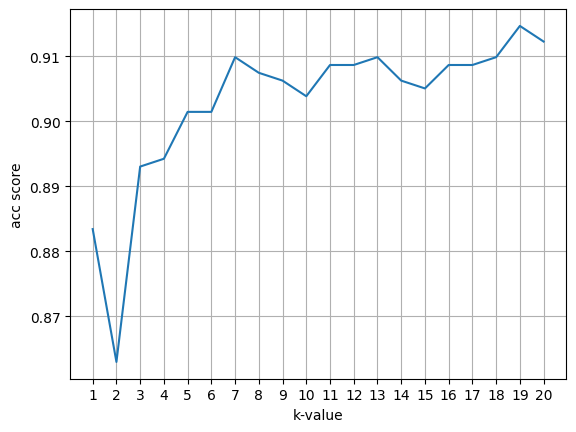

In [24]:
# Trying different k-values (0-20)
accuracies = []
for k in range(1,21):
    train_knn = KNeighborsClassifier(n_neighbors=k) #define the model
    train_knn.fit(training_features_scaled, training_labels) #train/fit model and data
    predictions_knn = train_knn.predict(testing_features_scaled) #predictions

    #print(metrics.confusion_matrix(testing_labels, predictions_knn)) #print confusion matrix with labels_train vs. the predictions
    acc = metrics.accuracy_score(testing_labels, predictions_knn) #get accuracy score
    #print("accuracy:",acc) #print accuracy score
    accuracies.append(acc)

plt.plot(range(1,21),accuracies,)
plt.ylabel('acc score')
plt.xlabel('k-value')
plt.xticks(range(1,21))
plt.grid()

In [25]:
train_knn = KNeighborsClassifier(n_neighbors=19) #define the model
train_knn.fit(training_features_scaled, training_labels) #train/fit model and data
predictions_knn = train_knn.predict(testing_features_scaled) #predictions

confusion_matrix = metrics.confusion_matrix(testing_labels, predictions_knn)
acc = metrics.accuracy_score(testing_labels, predictions_knn) #get accuracy score

print("Confusion Matrix:")
print(confusion_matrix) #print confusion matrix with labels_train vs. the predictions
print("Accuracy: ",acc) #print accuracy score

Confusion Matrix:
[[ 81   3   0   0   0   0]
 [  0 155  14   0   0   0]
 [  0  21 167   0   0   0]
 [  0   0   5 139   0   0]
 [  0   0   0   9 102   8]
 [  0   0   0   2   9 117]]
Accuracy:  0.9146634615384616


In [26]:
# Train RidgeClassifier
ridge = RidgeClassifier()
ridge.fit(training_features_scaled, training_labels)
prediction_ridge = ridge.predict(testing_features_scaled)

# confusion matrix with labels_train vs. the predictions
confusion_matrix = metrics.confusion_matrix(testing_labels, prediction_ridge)

acc = metrics.accuracy_score(
    testing_labels, prediction_ridge)  # get accuracy score

print("Confusion Matrix:")

print(confusion_matrix)
print("Accuracy: ", acc)  # print accuracy score


Confusion Matrix:
[[ 81   3   0   0   0   0]
 [  0 163   6   0   0   0]
 [  0  12 176   0   0   0]
 [  0  12  12 117   1   2]
 [  0   5  35   4  67   8]
 [  0  16  15   0   0  97]]
Accuracy:  0.8425480769230769


In [27]:
print("F1 Score for Ridge Regression : ", metrics.f1_score(
    testing_labels, prediction_ridge, average='macro'))

print("F1 Score for KNN : ", metrics.f1_score(
    testing_labels, predictions_knn, average='macro'))


F1 Score for Ridge Regression :  0.8466093427333665
F1 Score for KNN :  0.9205178077773293


# Conclusion

By selecting and extracting appropriate features from the activity sensors we can correctly predict the activity done. 
And KNN Classifier with k=19, performs the best with accuracy of 91% and an F1 Score of 0.92. 







# References

TSFEL was published in Barandas, Marília and Folgado, Duarte, et al. “TSFEL: Time Series Feature Extraction Library.” SoftwareX 11 (2020). [https://doi.org/10.1016/j.softx.2020.100456](https://doi.org/10.1016/j.softx.2020.100456)